In [27]:
class Empty(Exception):
    pass

class Stack:
    def __init__(self):
        self._data = [] #nowy pusty stos
    
    def __str__(self):
        return str(self._data)

    def __len__(self):
        return len(self._data)

    def is_empty(self):
        return len(self._data)==0

    def push(self,e):
        self._data.append(e)

    def top(self):
        if self.is_empty():
            raise Empty('Stack is empty')
        return self._data[-1]

    def pop(self):
        if self.is_empty():
            raise Empty('Stack is empty')
        return self._data.pop() 

Zadanie 1

In [37]:
import ctypes #tablice niskopoziomowe
class DynamicArray:

    def __init__(self):
        self._n = 0 #liczba elementów
        self._capacity = 1 #rozmiar tablicy
        self._A = self._make_array(self._capacity) #właściwa tablica

    def __str__(self):
        string = "|"
        for i in range(self._capacity):
            try:
                string += str(self._A[i]) + "|"
            except ValueError:
                string += " |"
        return string

    def __len__(self):
        return self._n

    def __getitem__(self,k):
        if not 0 <= k < self._n:
            raise IndexError('invalid index')
        return self._A[k]
    
    def insert(self, k, value):
        if k < 0 or k > self._n:
            print("please enter appropriate index..")
            return

        if self._n == self._capacity:
            self._resize(2*self._capacity)
        
        for i in range(self._n-1, k-1, -1):
            self._A[i+1] = self._A[i]
 
        self._A[k] = value
        self._n += 1
        
    def remove(self, value):
        indeks = []
        counter = 0
        for i in range(self._n):
            if self._A[i] == value:
                indeks.append(i-counter)
                counter += 1
            
        for i in indeks:
            for j in range(i, self._n-1):
                self._A[j] = self._A[j+1]
            self._n -= 1
            self._resize(self._capacity)

    def expand(self, seq):
        self._resize(len(self)+len(seq))
        for i in seq:
            self.append(i)

    def append(self,obj):
        if self._n == self._capacity:
            self._resize(2*self._capacity)
        self._A[self._n] = obj
        self._n += 1

    def _resize(self,c):
        B = self._make_array(c)
        for k in range(self._n):
            B[k] = self._A[k]
        self._A = B
        self._capacity = c

    def _make_array(self,c):
        return (c*ctypes.py_object)()

In [38]:
A = DynamicArray()

A.append(2)
A.append(1)
A.append(3)
A.append(7)
A._resize(7)

print(A)

A.insert(3, 69)
print(A)

A.expand([4,2,1,5,7,4])
print(A)

A.remove(1)
print(A)



|2|1|3|7| | | |
|2|1|3|69|7| | |
|2|1|3|69|7|4|2|1|5|7|4|
|2|3|69|7|4|2|5|7|4| | |


Zadanie 2

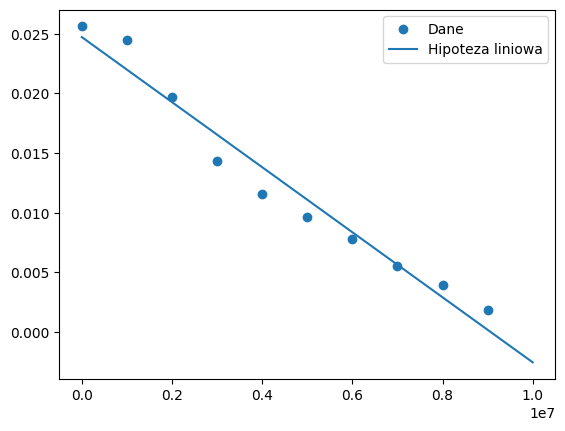

In [27]:
import time, matplotlib.pyplot as plt, random, numpy as np
from scipy.optimize import curve_fit

def f(x, a, b):
  return a*x+b

x2 = np.arange(1,10**7, 10**3)

lista = [0] * (10**7)
czasy = []
for i in range(1,10**7,10**6):
  t=0
  for k in range(100):
    start = time.time()
    lista.pop(i-1)
    end = time.time()
    t+=(end-start)
    lista.append(1)
  czasy.append(t/100)

popt, pcov = curve_fit(f, range(1,10**7,10**6), czasy)

plt.scatter(range(1,10**7,10**6), czasy, label="Dane")
plt.plot(x2, f(x2, *popt), label="Hipoteza liniowa")
plt.legend()
plt.show()




Zadanie 3

In [18]:
def SumaMacierzy(lista):
    sumaCała = 0
    for wiersz in lista:
        if len(wiersz) != len(lista):
            return "Macierz nie jest kwadratowa"
        for element in wiersz:
            sumaCała += element
    return sumaCała

A = [[1,2,3,4,5],
     [1,2,3,4,5],
     [1,2,3,4,5],
     [1,2,3,4,5],
     [1,2,3,4,5]]

B = [[1,2,3,4,5],
     [1,2,3,4,5],
     [1,2,3,4,5],
     [1,2,3,4,5]]

C = [[1,2,3,4,5],
     [1,2,3,4,5],
     [1,2,3,4,5],
     [1,2,3,4,5],
     [1,2,3,4,5,1]]

print(SumaMacierzy(A), SumaMacierzy(B), SumaMacierzy(C))

75 Macierz nie jest kwadratowa Macierz nie jest kwadratowa


Zadanie 4

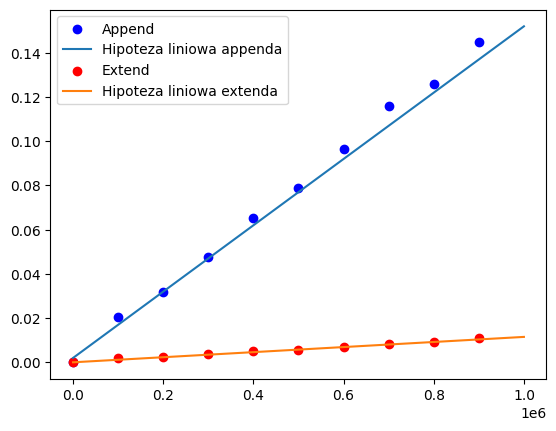

In [26]:
import time
from scipy.optimize import curve_fit

def f1(x, a, b):
  return a*x+b


popt1, pcov1 = curve_fit(f1, range(1,10**6,10**5), timesAppend)
popt2, pcov2 = curve_fit(f1, range(1,10**6,10**5), timesExtend)

x2 = np.arange(1,10**6, 10**2)
A = []

timesAppend = []
timesExtend = []

for i in range(1,10**6,10**5):
  t1=0
  t2=0
  for k in range(100):
    startAppend = time.time()
    for l in range(i):
        A.append(0)
    endAppend = time.time()
    t1+=(endAppend - startAppend)
    A = []

    startExtend = time.time()
    A.extend(i*[0])
    endExtend = time.time()
    t2+=(endExtend - startExtend)
  timesAppend.append(t1/100)
  timesExtend.append(t2/100)

plt.scatter(range(1,10**6,10**5), timesAppend, c = "blue", label = "Append")
plt.plot(x2, f(x2, *popt1), label="Hipoteza liniowa appenda")
plt.scatter(range(1,10**6,10**5), timesExtend, c = "red", label = "Extend")
plt.plot(x2, f(x2, *popt2), label="Hipoteza liniowa extenda")
plt.legend()
plt.show()


Zadanie 5

In [22]:
class Queue:
    DEFAULT_CAPACITY = 10

    def __init__(self):
        self._data = [None]*Queue.DEFAULT_CAPACITY
        self._size = 0
        self._front = 0

    def __str__(self):
        return str(self._data)+", "+str(self.first())
        
    def __len__(self):
        return self._size

    def is_empty(self):
        return self._size == 0

    def first(self):
        if self.is_empty():
            raise Empty('Queue is empty')
        return self._data[self._front]

    def dequeue(self):
        if self.is_empty():
            raise Empty('Queue is empty')
        value = self._data[self._front]
        self._data[self._front] = None
        self._front = (self._front+1)%len(self._data)
        self._size -= 1
        if self._size <= (len(self._data)/4):
            self._resize(self._size)
        return value

    def enqueue(self,e):
        if self._size == len(self._data):
            self._resize(2*len(self._data))
        avail = (self._front + self._size)%len(self._data)
        self._data[avail] = e
        self._size += 1

    def _resize(self,cap):
        old = self._data
        self._data = [None]*cap
        walk = self._front
        for k in range(self._size): #only existing elements
            self._data[k] = old[walk]
            walk = (1 + walk)%len(old)
        self._front = 0 

In [43]:
A = Queue()

A.enqueue(2)
A.enqueue(1)
A.enqueue(3)
A.enqueue(7)
print(A)

A.dequeue()
print(A)

A.dequeue()
print(A)

A.dequeue()
print(A)

[2, 1, 3, 7, None, None, None, None, None, None], 2
[None, 1, 3, 7, None, None, None, None, None, None], 1
[3, 7], 3
[None, 7], 7


Zadanie 6

In [76]:
class DoubleQueue:
    DEFAULT_CAPACITY = 10

    def __init__(self):
        self._data = [None]*Queue.DEFAULT_CAPACITY
        self._size = 0
        self._front = 0
        self._back = 0

    def __str__(self):
        return str(self._data)+", "+str(self.first()) +", "+ str(self.last())
        
    def __len__(self):
        return self._size

    def is_empty(self):
        return self._size == 0

    def first(self):
        if self.is_empty():
            raise Empty('Queue is empty')
        return self._data[self._front]
    
    def last(self):
        if self.is_empty():
            raise Empty('Queue is empty')
        return self._data[self._back]

    def delete_first(self):
        if self.is_empty():
            raise Empty('Queue is empty')
        value = self._data[self._front]
        self._data[self._front] = None
        self._front = (self._front+1)%len(self._data)
        self._size -= 1
        if self._size <= (len(self._data)/4):
            self._resize(self._size)
        return value
    
    def delete_last(self):
        if self.is_empty():
            raise Empty('Queue is empty')
        value = self._data[self._back]
        self._data[self._back] = None
        self._size -= 1
        if self._size <= (len(self._data)/4):
            self._resize(self._size)
        self._back = (self._front+self._size-1)%len(self._data)
        return value

    def add_last(self,e):
        if self._size == len(self._data):
            self._resize(2*len(self._data))
        avail = (self._front + self._size)%len(self._data)
        self._back = (self._front+self._size)%len(self._data)
        self._data[avail] = e
        self._size += 1
    
    def add_first(self,e):
        if self._size == len(self._data):
            self._resize(2*len(self._data))
        avail = (self._front-1)%len(self._data)
        self._front = (self._front-1)%len(self._data)
        self._data[avail] = e
        self._size += 1

    def _resize(self,cap):
        old = self._data
        self._data = [None]*cap
        walk = self._front
        for k in range(self._size): #only existing elements
            self._data[k] = old[walk]
            walk = (1 + walk)%len(old)
        self._front = 0 

In [78]:
X = DoubleQueue()
X.add_last(-3)
X.add_last(7)
X.add_last(1)
X.add_last(3)
X.add_last(5)
print(X)

X.delete_last()
X.delete_last()
X.delete_last()

print(X)

X.add_first(8)
print(X)

X.add_first(9)
print(X)

X.add_first(0)
X.add_last(1)

print(X)

[-3, 7, 1, 3, 5, None, None, None, None, None], -3, 5
[-3, 7], -3, 7
[-3, 7, None, 8], 8, 7
[-3, 7, 9, 8], 9, 7
[9, 8, -3, 7, 1, None, None, 0], 0, 1


Zadanie 7

In [79]:
def CheckHTML(file):
    """
    Funkcja sprawdzająca poprawność użycia znaczników w pliku HTML

    input:
        file[file] - plik html ktory sprawdzamy
    """
    plik = file.read()
    print("Sprawdzam plik "+str(file.name))
    stackZnacznikow = Stack()
    stackNawiasow = Stack()
    selfClosingTags = ['br',"area", 'base', 'col', 'embed', 
                        'hr', 'img', 'input', 'keygen', 'link', 
                        'meta', 'param', 'source', 'track', "wbr"]
    
    for i in range(len(plik)):
        if plik[i] == "<":
            stackNawiasow.push(plik[i])
            poczatekTaga = i
            koniecTaga = i

            #Pętla wyliczająca długość taga, konczy sie albo '>' albo spacją, bo niektore znaczniki moga miec w sobie jakieś parametry po spacji.
            while koniecTaga < len(plik) and plik[koniecTaga] not in ['>',' ']:
                koniecTaga += 1
            
            tag = plik[poczatekTaga+1:koniecTaga].lower()
            #Sprawdzamy taga, jezeli nie jest zamykajacy, nie jest komentarzem, nie zaczyna sie od 'view-source' i nie jest pojedynczy, dodajemy go do stosu
            if not tag.startswith('/'):
                if not tag.startswith("!"):
                    if tag[:11] != "view-source":
                        if not tag in selfClosingTags:
                            stackZnacznikow.push(tag)
            else: #tagi zamykajace
                para = False
                #Poniższa pętla porównuje pierwszy znacznik otwierający na stosie do naszego znacznika zamykającego.
                #Jeżeli nie znajdzie pary to usuwa pierwszy znacznik ze stosu i ponownie porównuje.
                #Zabezpiecza to przed sytuacja, w ktorej jeden niezamkniety znacznik rozbija wszystkie znaczniki zamykajace
                while para == False:
                    if len(stackZnacznikow) != 0 and stackZnacznikow.top() == tag[1:]:
                        stackZnacznikow.pop()
                        para = True
                    else:
                        print("Niezamkniety znacznik "+ stackZnacznikow.pop())
                        if len(stackZnacznikow) == 0:
                            print("Nieoczekiwany znacznik zamykajacy "+tag)
                
        #Zabezpieczenie przed losowymi nawiasami ostrymi            
        elif plik[i] == ">":
            if len(stackNawiasow) != 0:
                stackNawiasow.pop()
            else:
                print("Nieoczekiwany zamykajacy nawias ostry")
    while len(stackZnacznikow) != 0:
        niezamkniety = stackZnacznikow.pop()
        print("Niezamkniety znacznik "+ niezamkniety)
    while len(stackNawiasow) != 0:
        stackNawiasow.pop()
        print("Niezamkniety nawias ostry!")   
    print("Sprawdznie zakonczone")
            

In [80]:
plik1 = open("HTML_sample1.txt", "r")
CheckHTML(plik1)
plik2 = open("HTML_sample2.txt", "r")
CheckHTML(plik2)
plik3 = open("HTML_sample3.txt", "r")
CheckHTML(plik3)

Sprawdzam plik HTML_sample1.txt
Sprawdznie zakonczone
Sprawdzam plik HTML_sample2.txt
Niezamkniety znacznik html
Sprawdznie zakonczone
Sprawdzam plik HTML_sample3.txt
Niezamkniety znacznik table
Sprawdznie zakonczone


zadanie 8

In [83]:
def permuStack(n):
    """
    Funkcja nierekurencyjnie wypisująca wszystkie permutacje zbioru liczb od 1 do n wykorzystuja stos.

    input:
        n [int] - dlugosc zbioru
    
    output:
        permu [list] - lista permutacji
    """
    stos = Stack()
    stos.push((0,[]))
    permu = []

    while not stos.is_empty(): #powtarzamy do wyczerpania stosu
        indeks, temp = stos.pop()
        for i in range(1, n+1):
            if i not in temp: #jezeli dana liczba nie wystepuje w obecnej permutacji
                permutacja = temp + [i] #dodajemy ja do permutacji
                if indeks+1 == n: 
                    permu.append(permutacja) #jezeli permutacja jest dlugosci n, dodaj ja do wynikow
                else:
                    stos.push((indeks+1, permutacja)) #jesli nie, dodajemy na stos permutacje i miejsce w ktorym jestesmy
    
    return permu

permuStack(3)



        



[[3, 2, 1], [3, 1, 2], [2, 3, 1], [2, 1, 3], [1, 3, 2], [1, 2, 3]]

zadanie 9

In [26]:
class QueueyStack:
    def __init__(self):
        self.queue = Queue()
        self.tempList = []
    
    def push(self, item):
        s = len(self.queue)
        self.queue.enqueue(item)
        
        for i in range(s):
            self.queue.enqueue(self.queue.dequeue())
    
    def pop(self):
        if self.queue.is_empty():
            raise Empty("Stos jest pusty")
        return self.queue.dequeue()
    
    def top(self):
        return self.queue.first()
    
    def __str__(self):
        return str(self.queue)

x = QueueyStack()

x.push(2)
x.push(3)
x.push(4)

print(x)

print(x.pop())
print(x)

[2, None, 4, 3], 4
4
[2, None, None, 3], 3


zadanie 10

In [15]:

class StackyQueue:
    def __init__(self):
        self.firstStack = Stack()
        self.secondStack = Stack()
        
    def enQueue(self, item):
        while len(self.firstStack) != 0:
            x = self.firstStack.pop()
            self.secondStack.push(x)
            
        self.firstStack.push(item)

        while len(self.secondStack) != 0:
            y = self.secondStack.pop()
            self.firstStack.push(y)
        
    def deQueue(self):
        if self.firstStack.is_empty():
            raise Empty("The queue is empty")

        return self.firstStack.pop()

    def __str__(self):
        return str(self.firstStack)

x = StackyQueue()

x.enQueue(1)
x.enQueue(2)
x.enQueue(3)
x.enQueue(4)

print(x)
print(x.deQueue())


print(x)

[4, 3, 2, 1]
1
[4, 3, 2]
